<a href="https://colab.research.google.com/github/naveennekkanti1/Zeotap/blob/main/Nekkanti_DurganNaveen_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn



Most Popular Products (Top 10):
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-3-d3906338abba>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")


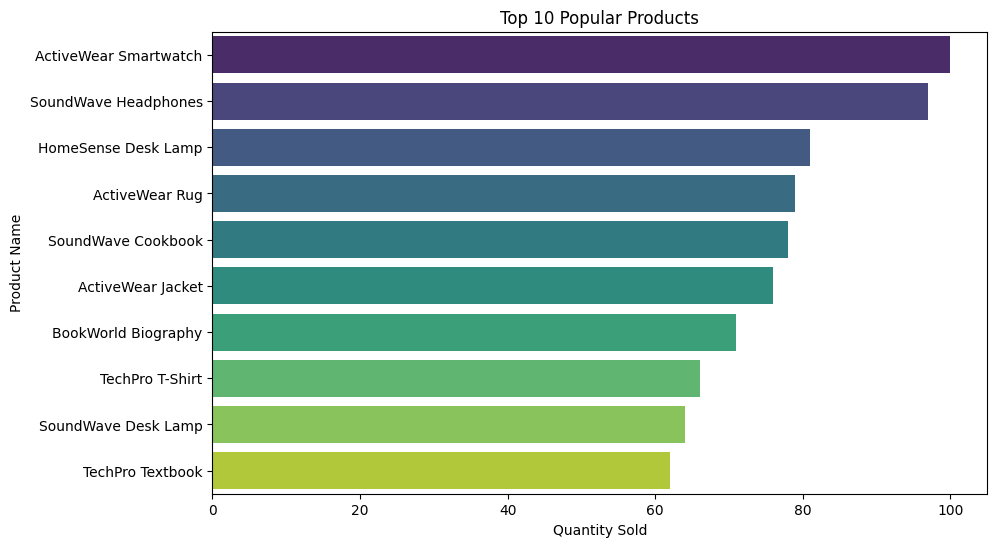


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


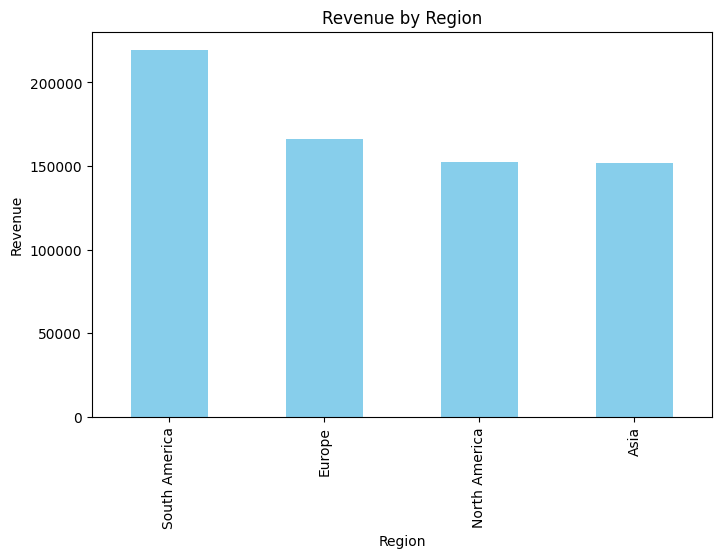


Monthly Sales Trends:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


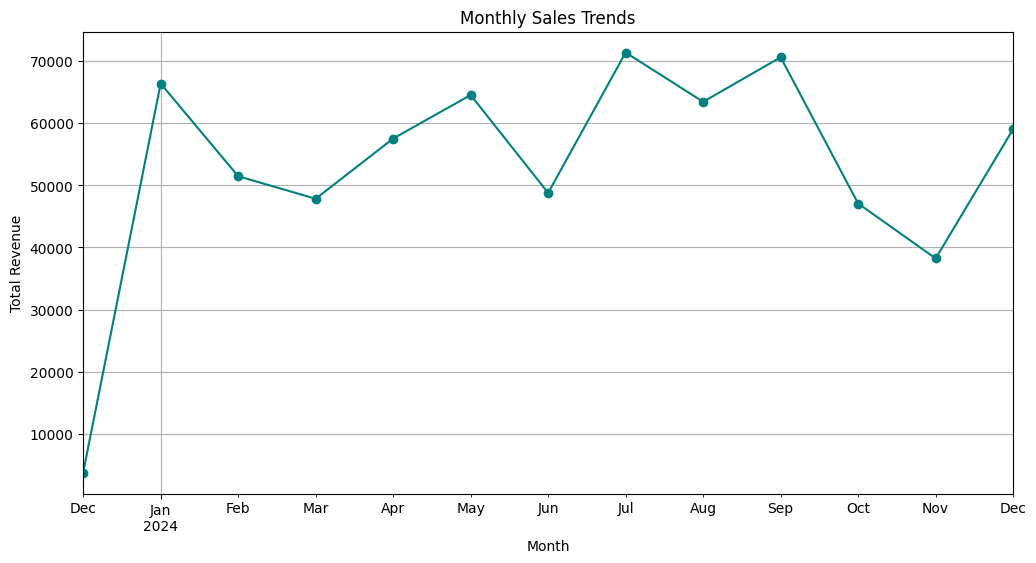


Top Spending Customers (Top 10):
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


<ipython-input-3-d3906338abba>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")


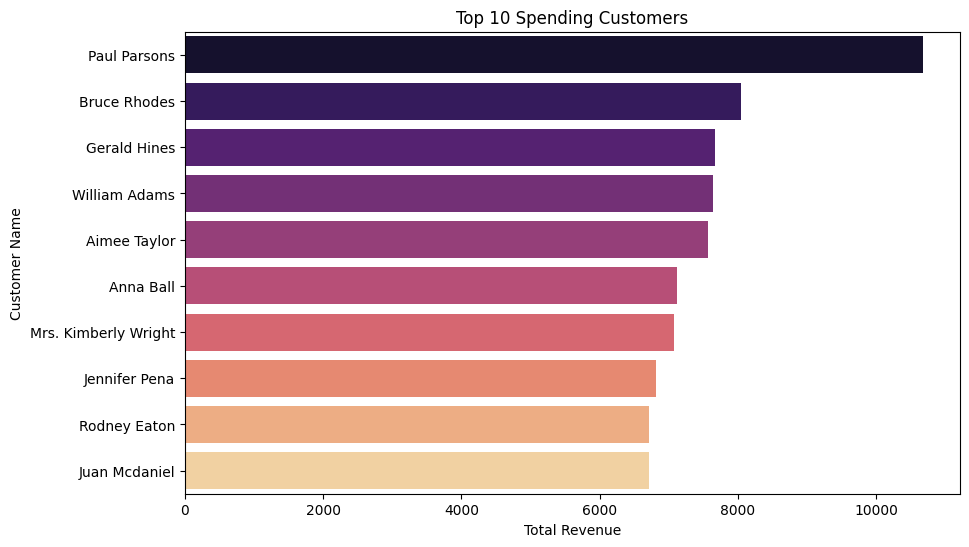


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


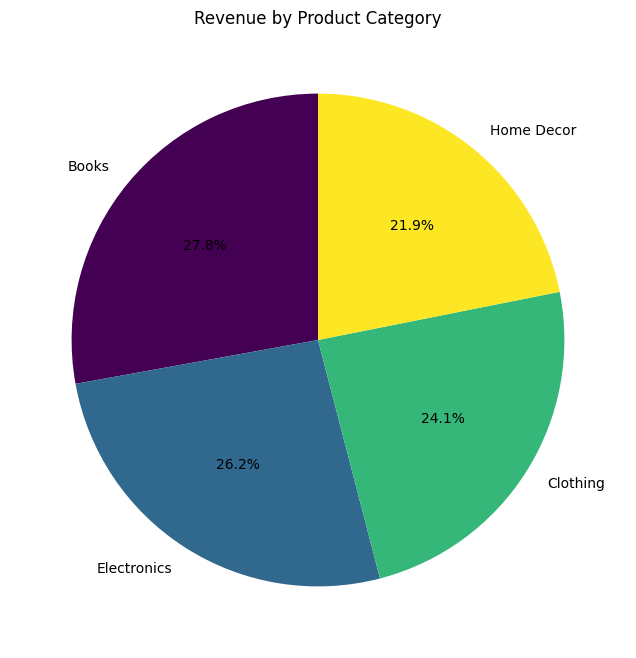

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Zetop/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zetop/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zetop/Transactions.csv")

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# 1. Most Popular Products
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Products (Top 10):")
print(popular_products)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")
plt.title("Top 10 Popular Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# 2. Revenue by Region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)

# Visualization
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

# 3. Monthly Sales Trends
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

monthly_sales = merged_data.groupby("Month")["TotalValue"].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)

# Visualization
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='teal')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# 4. Top Spending Customers
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop Spending Customers (Top 10):")
print(top_customers)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")
plt.title("Top 10 Spending Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.show()

# 5. Revenue by Product Category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)

# Visualization
plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title("Revenue by Product Category")
plt.ylabel("")
plt.show()
